In [6]:
import pandas as pd
KGO = pd.read_csv('KGO Station 426468 combined.csv', parse_dates=['5 Minutes'])
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv', parse_dates=['5 Minutes'])

KGO.set_index('5 Minutes', inplace=True)
oppo_KGO.set_index('5 Minutes', inplace=True)

In [7]:
KGO.head()

,Lane 1 Flow (Veh/5 Minutes),Lane 1 Delay(60) (Veh-Hours),Lane 2 Flow (Veh/5 Minutes),Lane 2 Delay(60) (Veh-Hours),Lane 3 Flow (Veh/5 Minutes),Lane 3 Delay(60) (Veh-Hours),Flow (Veh/5 Minutes),Delay (V_t=60) (Veh-Hours),# Lane Points,% Observed
5 Minutes,,,,,,,,,,
2024-01-01 00:00:00,7,0.0,21,0.0,22,0.0,50,0.0,3,0
2024-01-01 00:05:00,7,0.0,21,0.0,22,0.0,50,0.0,3,0
2024-01-01 00:10:00,8,0.0,22,0.0,23,0.0,53,0.0,3,0
2024-01-01 00:15:00,12,0.0,25,0.0,25,0.0,62,0.0,3,0
2024-01-01 00:20:00,12,0.0,25,0.0,25,0.0,62,0.0,3,0


In [8]:
oppo_KGO.head()

,Lane 1 Flow (Veh/5 Minutes),Lane 1 Delay(60) (Veh-Hours),Lane 2 Flow (Veh/5 Minutes),Lane 2 Delay(60) (Veh-Hours),Lane 3 Flow (Veh/5 Minutes),Lane 3 Delay(60) (Veh-Hours),Flow (Veh/5 Minutes),Delay (V_t=60) (Veh-Hours),# Lane Points,% Observed
5 Minutes,,,,,,,,,,
2024-01-01 00:00:00,26,0.0,43,0.0,30,0.0,99,0.0,3,0
2024-01-01 00:05:00,25,0.0,41,0.0,29,0.0,95,0.0,3,0
2024-01-01 00:10:00,24,0.0,40,0.0,28,0.0,92,0.0,3,0
2024-01-01 00:15:00,23,0.0,37,0.0,26,0.0,86,0.0,3,0
2024-01-01 00:20:00,22,0.0,36,0.0,25,0.0,83,0.0,3,0


In [9]:
# Define delay metric
def total_delay(df):
    return df['Delay (V_t=60) (Veh-Hours)'].sum()

# reallocate 1 lane from opposite direction during morning peak (7am–10am)
def simulate_shift(df_main, df_oppo, start_time, end_time):
    # Copy to avoid altering original data
    df_main_sim = df_main.copy()
    df_oppo_sim = df_oppo.copy()

    # Time filter
    peak = (df_main_sim.index.time >= start_time) & (df_main_sim.index.time < end_time)

    # Assume we add lane 1 from opposite direction to main, remove lane 1 from opposite
    df_main_sim.loc[peak, 'Flow (Veh/5 Minutes)'] += df_oppo_sim.loc[peak, 'Lane 1 Flow (Veh/5 Minutes)']
    df_main_sim.loc[peak, 'Delay (V_t=60) (Veh-Hours)'] *= 0.8  # Assume 20% delay reduction with added capacity

    df_oppo_sim.loc[peak, 'Flow (Veh/5 Minutes)'] -= df_oppo_sim.loc[peak, 'Lane 1 Flow (Veh/5 Minutes)']
    df_oppo_sim.loc[peak, 'Delay (V_t=60) (Veh-Hours)'] *= 1.2  # Assume 20% delay increase due to loss of a lane

    return total_delay(df_main_sim), total_delay(df_oppo_sim)

# Baseline delays
baseline_main = total_delay(KGO)
baseline_oppo = total_delay(oppo_KGO)

# Simulate morning and evening peak shift
delay_morning_main, delay_morning_oppo = simulate_shift(KGO, oppo_KGO, start_time=pd.to_datetime("07:00").time(), end_time=pd.to_datetime("10:00").time())
delay_evening_oppo, delay_evening_main = simulate_shift(oppo_KGO, KGO, start_time=pd.to_datetime("15:30").time(), end_time=pd.to_datetime("19:00").time())

# Print results
print(f"Baseline Total Delay: {baseline_main + baseline_oppo:.2f} veh-hours")
print(f"Post-Morning Shift Delay: {delay_morning_main + delay_morning_oppo:.2f} veh-hours")
print(f"Post-Evening Shift Delay: {delay_evening_main + delay_evening_oppo:.2f} veh-hours")

Baseline Total Delay: 5835.90 veh-hours
Post-Morning Shift Delay: 5531.58 veh-hours
Post-Evening Shift Delay: 5260.26 veh-hours


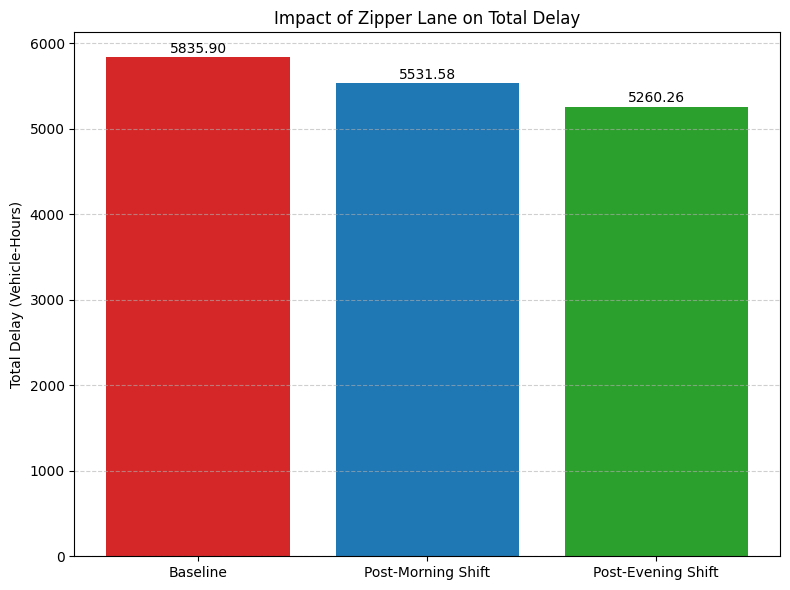

In [12]:
import matplotlib.pyplot as plt

# Total delays (from your results)
baseline_delay = baseline_main + baseline_oppo
morning_shift_delay = delay_morning_main + delay_morning_oppo
evening_shift_delay = delay_evening_main + delay_evening_oppo

# Labels and values
labels = ['Baseline', 'Post-Morning Shift', 'Post-Evening Shift']
delays = [baseline_delay, morning_shift_delay, evening_shift_delay]
colors = ['#d62728', '#1f77b4', '#2ca02c']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, delays, color=colors)
plt.ylabel('Total Delay (Vehicle-Hours)')
plt.title('Impact of Zipper Lane on Total Delay')

# Annotate the bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Load the data
KGO = pd.read_csv('KGO Station 426468 combined.csv')
oppo_KGO = pd.read_csv('oppo KGO Station 426452 combined.csv')

# Clean column names
KGO.columns = KGO.columns.str.strip()
oppo_KGO.columns = oppo_KGO.columns.str.strip()

# Standardize time column
KGO = KGO.rename(columns={'5 Minutes': 'Time'})
oppo_KGO = oppo_KGO.rename(columns={'5 Minutes': 'Time'})

# Convert to datetime
KGO['Time'] = pd.to_datetime(KGO['Time'])
oppo_KGO['Time'] = pd.to_datetime(oppo_KGO['Time'])

# Calculate total delay for each direction
KGO['Total Delay_EW'] = (
    KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    KGO['Lane 3 Delay(60) (Veh-Hours)']
)

oppo_KGO['Total Delay_WE'] = (
    oppo_KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 3 Delay(60) (Veh-Hours)']
)

# Merge on Time
df = pd.merge(KGO[['Time', 'Total Delay_EW']], oppo_KGO[['Time', 'Total Delay_WE']], on='Time')
df['Hour'] = df['Time'].dt.hour

# Define time periods
def get_period(hour):
    if 6 <= hour < 10:
        return 'AM'
    elif 15 <= hour < 19:
        return 'PM'
    else:
        return 'OffPeak'

df['Period'] = df['Hour'].apply(get_period)

# Define congestion levels
def get_congestion_level(delay):
    if delay < 0.5:
        return 'low'
    elif delay < 1.5:
        return 'moderate'
    else:
        return 'high'

df['EW_cong'] = df['Total Delay_EW'].apply(get_congestion_level)
df['WE_cong'] = df['Total Delay_WE'].apply(get_congestion_level)

# Define traffic state
df['state'] = list(zip(df['Period'], df['EW_cong'], df['WE_cong']))

# Simulate control actions
state_actions = {}
for state in df['state'].unique():
    # Filter rows matching this state
    subset = df[df['state'] == state]
    avg_EW = subset['Total Delay_EW'].mean()
    avg_WE = subset['Total Delay_WE'].mean()

    actions = {
        'shift_EW': avg_EW * 0.85 + avg_WE * 1.05,
        'shift_WE': avg_EW * 1.05 + avg_WE * 0.85,
        'hold': avg_EW + avg_WE
    }

    for action, total_delay in actions.items():
        state_actions[(state, action)] = total_delay

# Sort by lowest total delay
best_actions = sorted(state_actions.items(), key=lambda x: x[1])

# Display top recommended actions
print("Top 10 Optimal State-Actions (Lowest Delay):")
for (state, action), delay in best_actions[:10]:
    print(f"State: {state}, Action: {action}, Total Delay: {delay:.2f} veh-hours")


Top 10 Optimal State-Actions (Lowest Delay):
State: ('OffPeak', 'low', 'low'), Action: shift_WE, Total Delay: 0.00 veh-hours
State: ('OffPeak', 'low', 'low'), Action: hold, Total Delay: 0.00 veh-hours
State: ('OffPeak', 'low', 'low'), Action: shift_EW, Total Delay: 0.00 veh-hours
State: ('AM', 'low', 'low'), Action: shift_EW, Total Delay: 0.04 veh-hours
State: ('PM', 'low', 'low'), Action: shift_WE, Total Delay: 0.04 veh-hours
State: ('AM', 'low', 'low'), Action: shift_WE, Total Delay: 0.04 veh-hours
State: ('AM', 'low', 'low'), Action: hold, Total Delay: 0.04 veh-hours
State: ('PM', 'low', 'low'), Action: hold, Total Delay: 0.04 veh-hours
State: ('PM', 'low', 'low'), Action: shift_EW, Total Delay: 0.04 veh-hours
State: ('OffPeak', 'low', 'moderate'), Action: shift_WE, Total Delay: 0.63 veh-hours


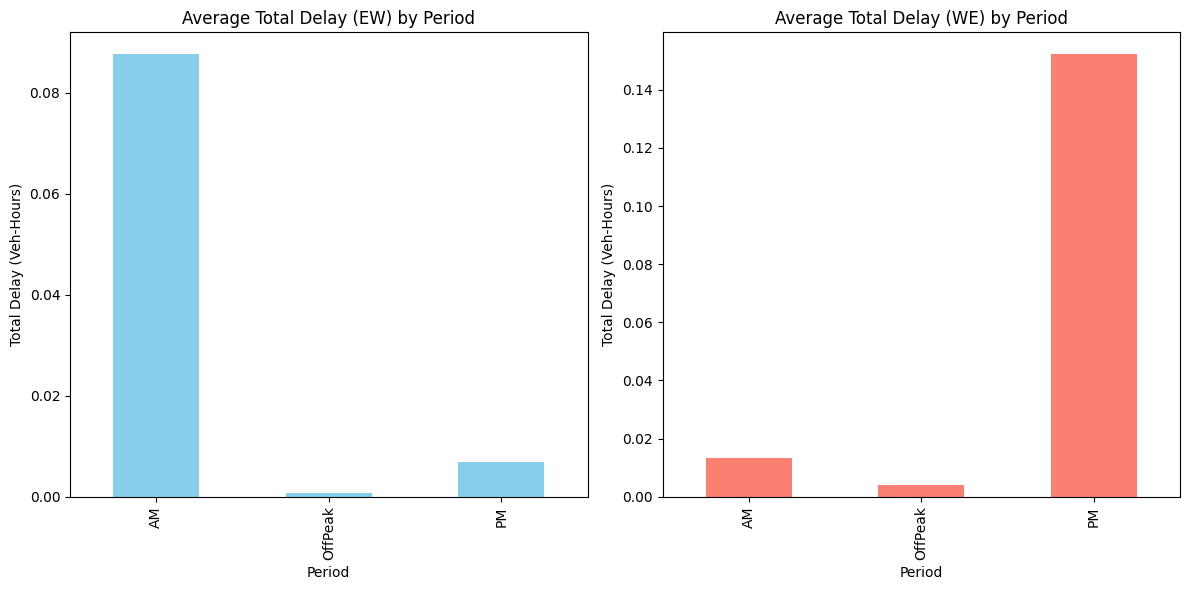

In [17]:
import matplotlib.pyplot as plt


KGO['Time'] = pd.to_datetime(KGO['Time'])
oppo_KGO['Time'] = pd.to_datetime(oppo_KGO['Time'])

# Calculate total delay for each direction
KGO['Total Delay_EW'] = (
    KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    KGO['Lane 3 Delay(60) (Veh-Hours)']
)

oppo_KGO['Total Delay_WE'] = (
    oppo_KGO['Lane 1 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 2 Delay(60) (Veh-Hours)'] +
    oppo_KGO['Lane 3 Delay(60) (Veh-Hours)']
)

df = pd.merge(KGO[['Time', 'Total Delay_EW']], oppo_KGO[['Time', 'Total Delay_WE']], on='Time')
df['Hour'] = df['Time'].dt.hour

def get_period(hour):
    if 6 <= hour < 10:
        return 'AM'
    elif 15 <= hour < 19:
        return 'PM'
    else:
        return 'OffPeak'

df['Period'] = df['Hour'].apply(get_period)

# Define congestion levels
def get_congestion_level(delay):
    if delay < 0.5:
        return 'low'
    elif delay < 1.5:
        return 'moderate'
    else:
        return 'high'

df['EW_cong'] = df['Total Delay_EW'].apply(get_congestion_level)
df['WE_cong'] = df['Total Delay_WE'].apply(get_congestion_level)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df.groupby('Period')['Total Delay_EW'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Total Delay (EW) by Period')
plt.xlabel('Period')
plt.ylabel('Total Delay (Veh-Hours)')

plt.subplot(1, 2, 2)
df.groupby('Period')['Total Delay_WE'].mean().plot(kind='bar', color='salmon')
plt.title('Average Total Delay (WE) by Period')
plt.xlabel('Period')
plt.ylabel('Total Delay (Veh-Hours)')

plt.tight_layout()
plt.show()


<ipython-input-18-786885907980>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Action', y='Total Delay', data=df_top_actions, hue='Period', ci=None)


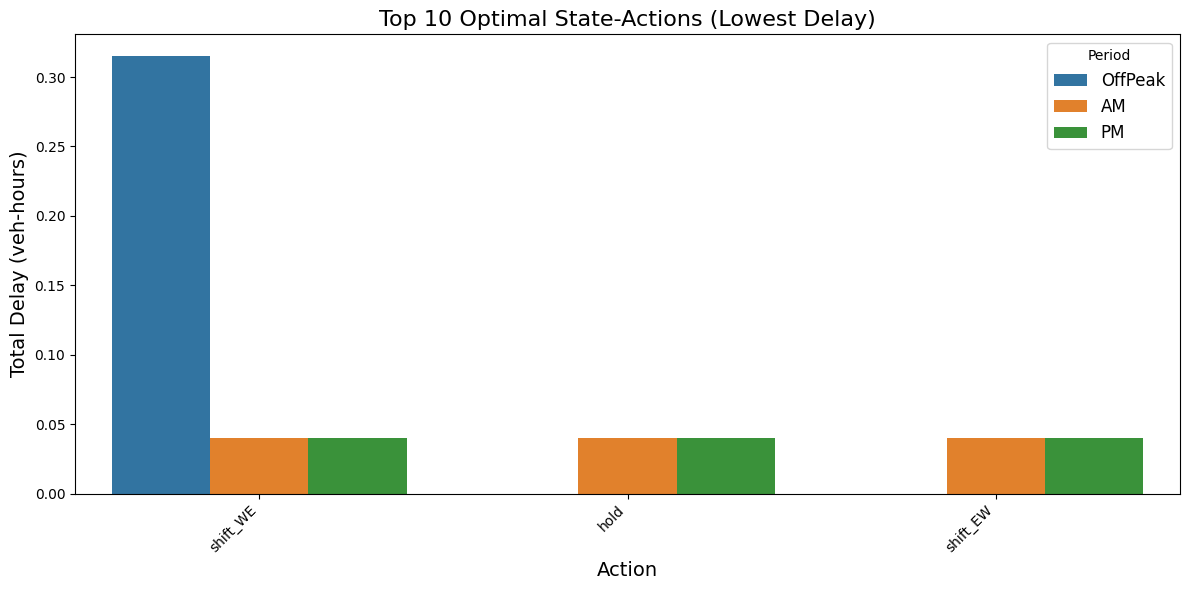

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for the bar chart
top_actions = [
    ('OffPeak', 'low', 'low', 'shift_WE', 0.00),
    ('OffPeak', 'low', 'low', 'hold', 0.00),
    ('OffPeak', 'low', 'low', 'shift_EW', 0.00),
    ('AM', 'low', 'low', 'shift_EW', 0.04),
    ('PM', 'low', 'low', 'shift_WE', 0.04),
    ('AM', 'low', 'low', 'shift_WE', 0.04),
    ('AM', 'low', 'low', 'hold', 0.04),
    ('PM', 'low', 'low', 'hold', 0.04),
    ('PM', 'low', 'low', 'shift_EW', 0.04),
    ('OffPeak', 'low', 'moderate', 'shift_WE', 0.63)
]

df_top_actions = pd.DataFrame(top_actions, columns=['Period', 'EW Congestion', 'WE Congestion', 'Action', 'Total Delay'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Action', y='Total Delay', data=df_top_actions, hue='Period', ci=None)

plt.title('Top 10 Optimal State-Actions (Lowest Delay)', fontsize=16)
plt.xlabel('Action', fontsize=14)
plt.ylabel('Total Delay (veh-hours)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Period', fontsize=12)

plt.show()


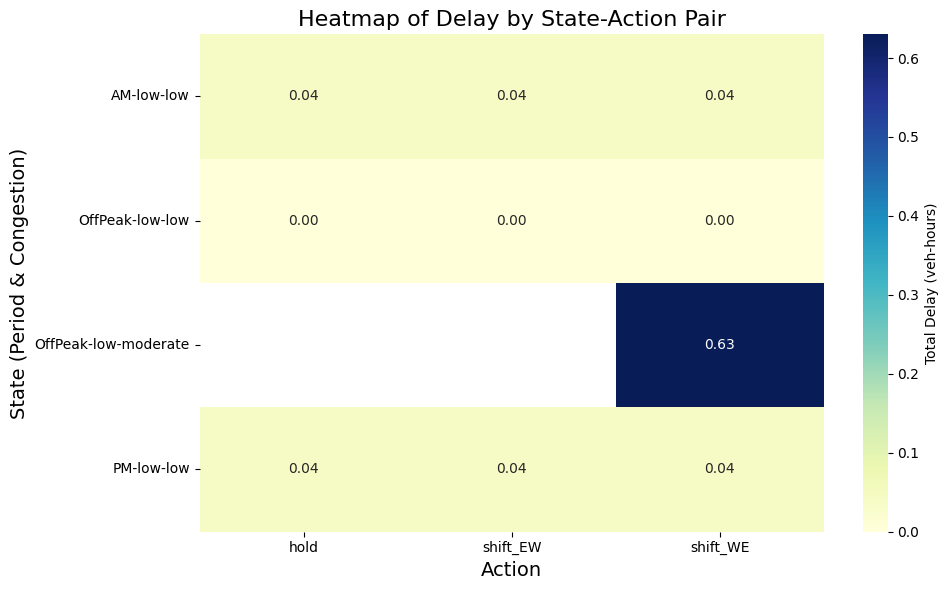

In [19]:
heatmap_data = df_top_actions.pivot_table(
    index=['Period', 'EW Congestion', 'WE Congestion'],
    columns='Action',
    values='Total Delay',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Total Delay (veh-hours)'})

plt.title('Heatmap of Delay by State-Action Pair', fontsize=16)
plt.xlabel('Action', fontsize=14)
plt.ylabel('State (Period & Congestion)', fontsize=14)

plt.tight_layout()
plt.show()
